<a href="https://colab.research.google.com/github/ulkuhos/YSA_Dersi_2024/blob/main/Ulku_MLP_Models_Midterm_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Veri işleme
import pandas as pd
import numpy as np

# Model oluşturma ve değerlendirme
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# TensorFlow ve Keras
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input

In [61]:
# Gerekli PyTorch modüllerini ekleme
from torchvision import datasets, transforms

# Veri setini indirip yükleme (eğitim ve test setleri)
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))  # Veriyi normalize et
])

# Eğitim ve test setleri
train_data = datasets.GTSRB(root='./data', split='train', transform=transform, download=True)
test_data = datasets.GTSRB(root='./data', split='test', transform=transform, download=True)

# Veri seti boyutlarını kontrol et
print(f"Eğitim verisi boyutu: {len(train_data)}")
print(f"Test verisi boyutu: {len(test_data)}")


Eğitim verisi boyutu: 26640
Test verisi boyutu: 12630


In [62]:
# Gerekli kütüphaneler
from torchvision.transforms import functional as F

# Eğitim setindeki görüntüleri numpy formatına dönüştürme ve yeniden boyutlandırma
X_train = np.array([F.resize(img[0], (32, 32)).numpy().flatten() for img in train_data])
y_train = np.array([img[1] for img in train_data])

# Test setindeki görüntüleri numpy formatına dönüştürme ve yeniden boyutlandırma
X_test = np.array([F.resize(img[0], (32, 32)).numpy().flatten() for img in test_data])
y_test = np.array([img[1] for img in test_data])

# Veriyi ölçeklendirme
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("Veri başarıyla ölçeklendirildi.")
print(f"Ölçeklendirilmiş eğitim verisi boyutu: {X_train_scaled.shape}")
print(f"Ölçeklendirilmiş test verisi boyutu: {X_test_scaled.shape}")


Veri başarıyla ölçeklendirildi.
Ölçeklendirilmiş eğitim verisi boyutu: (26640, 3072)
Ölçeklendirilmiş test verisi boyutu: (12630, 3072)


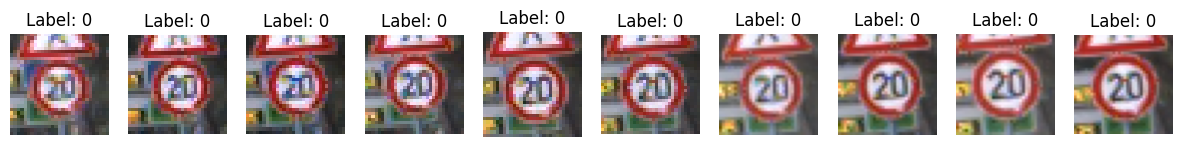

In [54]:
# Eğitim veri setinden birkaç örneği görselleştirme
import matplotlib.pyplot as plt

# Görüntülerin ilk 10 tanesini görselleştirme
# Görsellerin normalize edilmiş değerlerini [0, 1] aralığına çekerek düzeltiyoruz
fig, axes = plt.subplots(1, 10, figsize=(15, 5))  # 1 satır, 5 sütun
for i, ax in enumerate(axes):
   # Görüntüyü yeniden boyutlandır ve normalize etmeden göster
    img = train_data[i][0].permute(1, 2, 0).numpy()  # Tensörü numpy array'e çevir. # Görüntüyü (H, W, C) formatına çevir
    img = (img - img.min()) / (img.max() - img.min())  # Görseli 0-1 aralığına döndür
    ax.imshow(img)  # Görüntüyü göster
    ax.set_title(f"Label: {train_data[i][1]}")  # Etiket ekle
    ax.axis('off')  # Eksenleri kapat
plt.show()


In [5]:
# Etiketlerin dağılımını kontrol etme
import numpy as np
labels = [train_data[i][1] for i in range(len(train_data))]
unique, counts = np.unique(labels, return_counts=True)

print("Sınıf dağılımı:")
for u, c in zip(unique, counts):
    print(f"Label {u}: {c} örnek")

Sınıf dağılımı:
Label 0: 150 örnek
Label 1: 1500 örnek
Label 2: 1500 örnek
Label 3: 960 örnek
Label 4: 1320 örnek
Label 5: 1260 örnek
Label 6: 300 örnek
Label 7: 960 örnek
Label 8: 960 örnek
Label 9: 990 örnek
Label 10: 1350 örnek
Label 11: 900 örnek
Label 12: 1410 örnek
Label 13: 1440 örnek
Label 14: 540 örnek
Label 15: 420 örnek
Label 16: 300 örnek
Label 17: 750 örnek
Label 18: 810 örnek
Label 19: 150 örnek
Label 20: 240 örnek
Label 21: 240 örnek
Label 22: 270 örnek
Label 23: 360 örnek
Label 24: 180 örnek
Label 25: 1020 örnek
Label 26: 420 örnek
Label 27: 180 örnek
Label 28: 360 örnek
Label 29: 180 örnek
Label 30: 300 örnek
Label 31: 540 örnek
Label 32: 180 örnek
Label 33: 480 örnek
Label 34: 300 örnek
Label 35: 810 örnek
Label 36: 270 örnek
Label 37: 150 örnek
Label 38: 1380 örnek
Label 39: 210 örnek
Label 40: 240 örnek
Label 41: 180 örnek
Label 42: 180 örnek


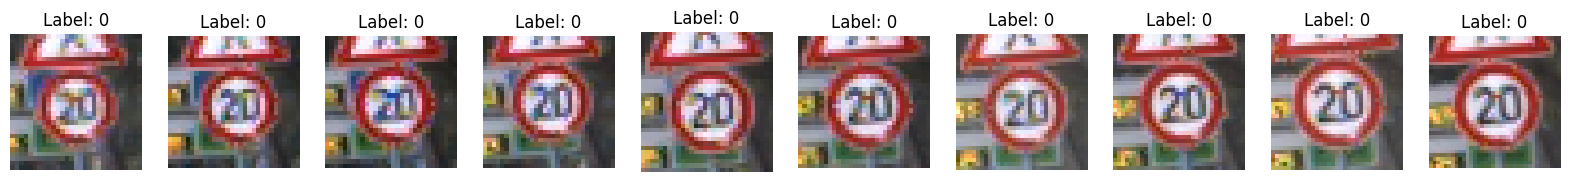

In [84]:
# İlk 10 görüntüyü etiketlerle görselleştirme
fig, axes = plt.subplots(1, 10, figsize=(20, 5))
for i, ax in enumerate(axes):
    img = train_data[i][0].permute(1, 2, 0).numpy()
    img = (img - img.min()) / (img.max() - img.min())
    ax.imshow(img)
    ax.set_title(f"Label: {train_data[i][1]}")
    ax.axis('off')
plt.show()


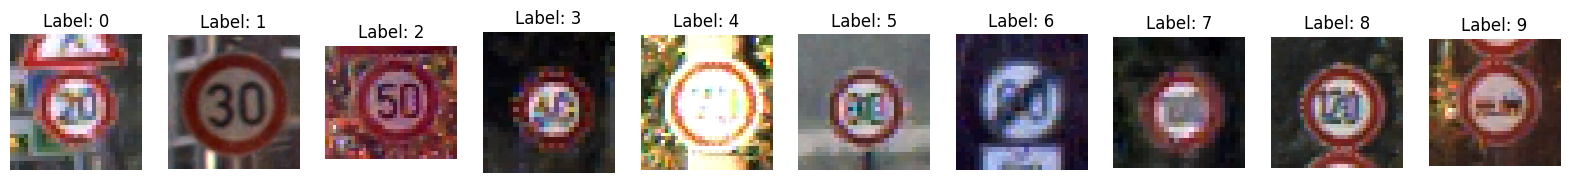

In [83]:
# Farklı 10 sınıftan birer örnek seçip görselleştirme
fig, axes = plt.subplots(1, 10, figsize=(20, 5))
unique_labels = set()
i = 0

for img, label in train_data:
    if label not in unique_labels:
        img = img.permute(1, 2, 0).numpy()
        img = (img - img.min()) / (img.max() - img.min())
        axes[i].imshow(img)
        axes[i].set_title(f"Label: {label}")
        axes[i].axis('off')
        unique_labels.add(label)
        i += 1
    if i == 10:  # 10 farklı sınıfı görselleştir
        break
plt.show()


# 1- MLP MODELLERİ

Gerekli kütüphaneler ve kurumları

## MLP MODEL 1 : Model Eğitimi

In [8]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report

mlp_model1 = MLPClassifier(
    max_iter=100,  # 100 epoch
    batch_size=16,  # Her iterasyonda 16 örnek
    random_state=42
)
mlp_model1.fit(X_train_scaled, y_train)

y_pred_model1 = mlp_model1.predict(X_test_scaled)
print("Model 1 - Performans (Düşük Epoch ve Küçük Batch Size)")
print(classification_report(y_test, y_pred_model1))



Model 1 - Performans (Düşük Epoch ve Küçük Batch Size)
              precision    recall  f1-score   support

           0       0.94      0.48      0.64        60
           1       0.60      0.65      0.63       720
           2       0.83      0.79      0.81       750
           3       0.77      0.49      0.60       450
           4       0.61      0.56      0.59       660
           5       0.41      0.90      0.57       630
           6       0.93      0.59      0.72       150
           7       0.80      0.70      0.75       450
           8       0.86      0.64      0.73       450
           9       0.89      0.84      0.86       480
          10       0.97      0.82      0.89       660
          11       0.68      0.82      0.74       420
          12       0.97      0.89      0.93       690
          13       0.97      0.98      0.97       720
          14       0.99      0.81      0.89       270
          15       0.87      0.76      0.81       210
          16       0.95   

## MLP MODEL 1 : RandomSearchCV ile Hiperparametre Optimizasyonu

In [9]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report
from sklearn.model_selection import RandomizedSearchCV
import numpy as np

# Hiperparametre aralığını tanımladık
param_dist_model1 = {
    'hidden_layer_sizes': [(50,), (100,), (50, 50)],  # Daha az kombinasyon
    'activation': ['relu', 'tanh'],  # Aktivasyon fonksiyonları
    'solver': ['adam'],  # Daha hızlı optimizasyon algoritması
    'alpha': [0.0001, 0.001],  # L2 regülarizasyon
    'batch_size': [32],  # Sabit batch size
    'learning_rate_init': [0.001, 0.005],  # Öğrenme oranı
    'max_iter': [100]  # Düşük epoch sayısı
}

# RandomizedSearchCV tanımlama
random_search_model1 = RandomizedSearchCV(
    MLPClassifier(random_state=42, early_stopping=True),  # Early stopping ile eğitim süresini kısaltma
    param_distributions=param_dist_model1,
    n_iter=10,  # Rastgele 10 kombinasyon dene
    cv=3,  # 3 katlı çapraz doğrulama
    scoring='accuracy',  # Doğruluk metriği
    n_jobs=-1,  # Tüm işlemcileri kullan
    verbose=2  # İşlem ilerlemesini göster
)

# Modeli eğitme
random_search_model1.fit(X_train_scaled, y_train)

# En iyi hiperparametreleri ve sonuçları yazdırma
print("Model 1 - En iyi hiperparametreler:", random_search_model1.best_params_)
print("Model 1 - En iyi doğruluk skoru (cv):", random_search_model1.best_score_)

# En iyi modeli test seti üzerinde değerlendirme
best_model1 = random_search_model1.best_estimator_
y_pred_model1 = best_model1.predict(X_test_scaled)
print("Model 1 - Performans (Hiperparametre Optimizasyonu ile)")
print(classification_report(y_test, y_pred_model1))


Fitting 3 folds for each of 10 candidates, totalling 30 fits
Model 1 - En iyi hiperparametreler: {'solver': 'adam', 'max_iter': 100, 'learning_rate_init': 0.001, 'hidden_layer_sizes': (50,), 'batch_size': 32, 'alpha': 0.001, 'activation': 'tanh'}
Model 1 - En iyi doğruluk skoru (cv): 0.7338213213213214
Model 1 - Performans (Hiperparametre Optimizasyonu ile)
              precision    recall  f1-score   support

           0       0.46      0.45      0.45        60
           1       0.74      0.81      0.78       720
           2       0.72      0.89      0.80       750
           3       0.83      0.77      0.80       450
           4       0.75      0.63      0.68       660
           5       0.76      0.72      0.74       630
           6       0.89      0.68      0.77       150
           7       0.82      0.76      0.79       450
           8       0.80      0.73      0.76       450
           9       0.88      0.88      0.88       480
          10       0.80      0.92      0.86  

**Sonuç olarak:** Model 1, hiperparametre optimizasyonuyla %81 doğruluk elde etmiştir. Sonuçta macro metriklerde precision: %78, recall: %75, f1-score: %76 değerlerine ulaşıldığını görmekteyiz. Büyük sınıflarda yüksek performans, küçük sınıflarda ise ortalama düzeyde bir başarı sağlamıştır diyebiliriz. Genel olarak model dengeli bir performans göstermiştir.

## MLP MODEL 1 :  Kayıp değerleri grafiği


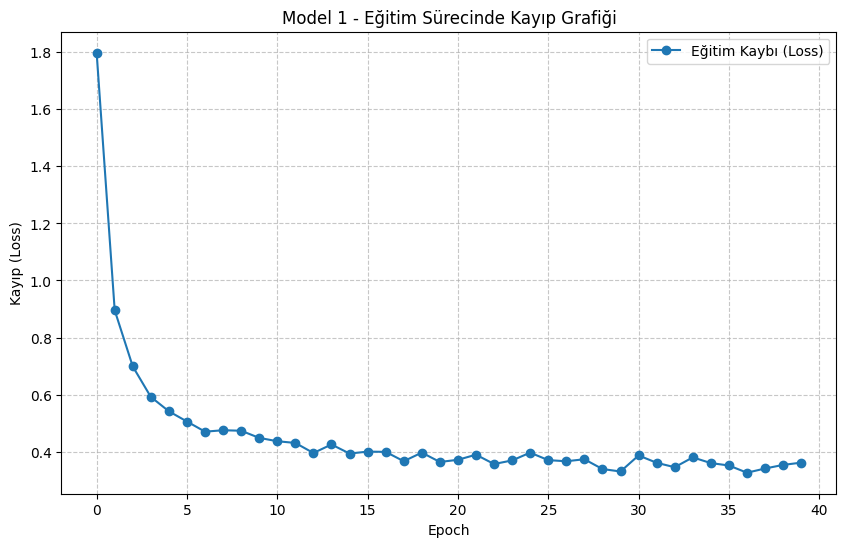

In [82]:
import matplotlib.pyplot as plt

# Model 1'in kayıp eğrisi (loss_curve_) kontrol edilerek görselleştirilmesi
if hasattr(best_model1, "loss_curve_"):
    plt.figure(figsize=(10, 6))
    plt.plot(best_model1.loss_curve_, label='Eğitim Kaybı (Loss)', marker='o')
    plt.title('Model 1 - Eğitim Sürecinde Kayıp Grafiği')
    plt.xlabel('Epoch')
    plt.ylabel('Kayıp (Loss)')
    plt.legend()
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.show()
else:
    print("Model 1'de loss_curve_ özelliği bulunamadı.")


**Grafik bize,** Model 1'in eğitim sürecinde kaybın hızlı bir şekilde azaldığını ve yaklaşık olarak 15. epoch'tan sonra daha stabil hale geldiğini gösteriyor. Bu, modelin başarılı bir şekilde öğrendiğini ve genelleme yeteneğinin iyi olduğunu gösteriyor.

## MLP MODEL 1 : Karışıklık Matrisi:

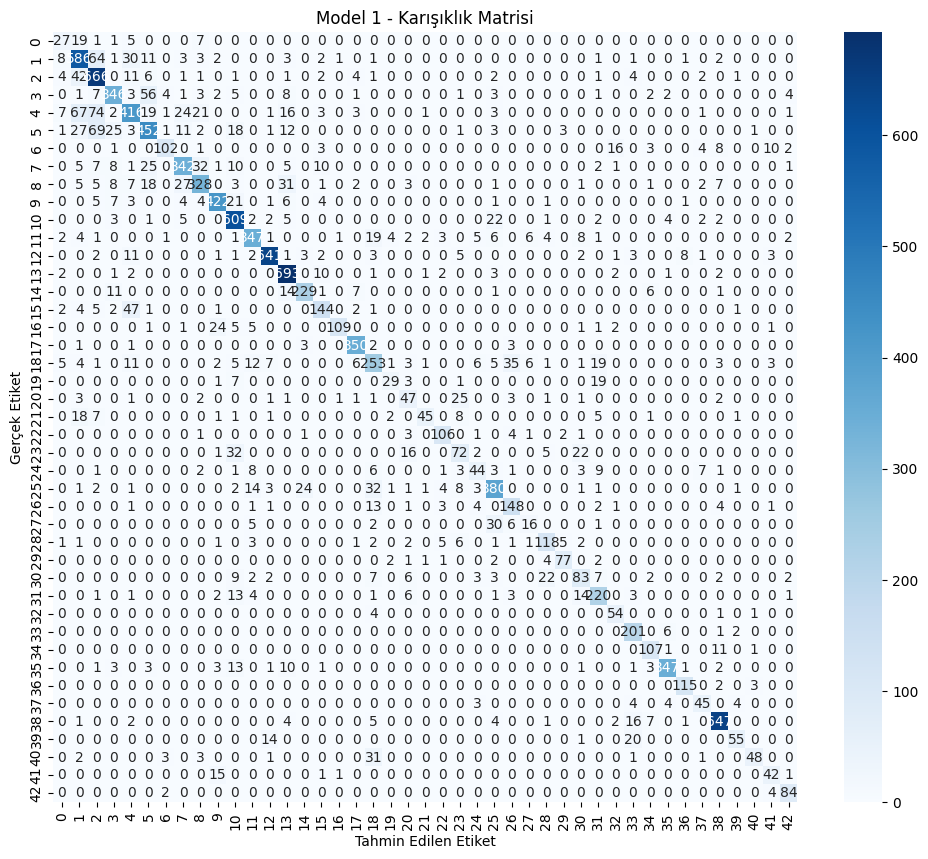

In [87]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Model 1 için karışıklık matrisi oluşturma
cm_model1 = confusion_matrix(y_test, y_pred_model1)

# Karışıklık matrisini görselleştirme
plt.figure(figsize=(12, 10))
sns.heatmap(cm_model1, annot=True, fmt='d', cmap='Blues', cbar=True)
plt.title('Model 1 - Karışıklık Matrisi')
plt.xlabel('Tahmin Edilen Etiket')
plt.ylabel('Gerçek Etiket')
plt.show()


# NOT: Model 1'in İlk Hali ve RandomizedSearchCV ile Optimize Edilmiş Hali Arasındaki Fark:

RandomizedSearchCV ile optimize edilen model 1, hiperparametre optimizasyonu sayesinde genel doğrulukta iyileşme sağlamış ve sınıf bazında recall ve F1-Score değerlerinde tutarlılık göstermiştir. Bu, optimize edilen modelin gerçek dünya verileri üzerinde daha genel geçer bir performansa sahip olabileceğini bizlere göstermektedir.

Optimize edilmiş modelde, %5 doğruluk artışı ve daha tutarlı sınıf performansı ile daha başarılı bir sonuç verdiğini gözlemliyoruz.


## MLP MODEL 2 : Model Eğitimi

In [16]:
mlp_model2 = MLPClassifier(
    hidden_layer_sizes=(30, 30),  # İki katman, her biri 30 nöron
    max_iter=150,  # 150 epoch
    batch_size=32,  # Her iterasyonda 32 örnek
    learning_rate_init=0.01,  # Öğrenme oranı 0.01
    random_state=42
)
mlp_model2.fit(X_train_scaled, y_train)

y_pred_model2 = mlp_model2.predict(X_test_scaled)
print("Model 2 - Performans (Düşük Oranlarla)")
print(classification_report(y_test, y_pred_model2))



Model 2 - Performans (Düşük Oranlarla)
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        60
           1       0.00      0.00      0.00       720
           2       0.27      0.05      0.09       750
           3       0.00      0.00      0.00       450
           4       0.22      0.39      0.28       660
           5       0.09      0.87      0.16       630
           6       0.00      0.00      0.00       150
           7       0.00      0.00      0.00       450
           8       0.00      0.00      0.00       450
           9       0.84      0.41      0.55       480
          10       0.41      0.22      0.28       660
          11       0.97      0.40      0.57       420
          12       0.91      0.58      0.71       690
          13       0.91      0.92      0.91       720
          14       0.86      0.49      0.63       270
          15       0.00      0.00      0.00       210
          16       0.67      0.40      0.5

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


## MLP MODEL 2 : RandomizedSearchCV ile Hiperparametre Optimizasyonu

In [11]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report
from sklearn.model_selection import RandomizedSearchCV
import numpy as np

# Hiperparametre aralıkları
param_dist_model2 = {
    'hidden_layer_sizes': [(30, 30), (50, 30), (30, 30, 30)],  # Farklı katman yapılarını test etme
    'activation': ['relu', 'tanh'],  # Aktivasyon fonksiyonları
    'solver': ['adam'],  # Daha hızlı optimizasyon algoritması
    'alpha': [0.0001, 0.001, 0.01],  # L2 regülarizasyon parametresi
    'batch_size': [16, 32],  # Mini-batch boyutları
    'learning_rate_init': [0.001, 0.01, 0.005],  # Öğrenme oranları
    'max_iter': [150]  # Epoch sayısı sabit tutuldu
}

# RandomizedSearchCV tanımlama
random_search_model2 = RandomizedSearchCV(
    MLPClassifier(random_state=42, early_stopping=True),  # Early stopping ile fazla iterasyonları engelleme
    param_distributions=param_dist_model2,
    n_iter=10,  # Rastgele 10 farklı kombinasyon deneme
    cv=3,  # 3 katlı çapraz doğrulama
    scoring='accuracy',  # Doğruluk metriği
    n_jobs=-1,  # Tüm işlemcileri kullan
    verbose=2
)

# Modeli eğitme
random_search_model2.fit(X_train_scaled, y_train)

# En iyi hiperparametreleri ve sonuçları yazdırma
print("Model 2 - En iyi hiperparametreler:", random_search_model2.best_params_)
print("Model 2 - En iyi doğruluk skoru (cv):", random_search_model2.best_score_)

# En iyi modeli test seti üzerinde değerlendirme
best_model2 = random_search_model2.best_estimator_
y_pred_model2 = best_model2.predict(X_test_scaled)
print("Model 2 - Performans (Hiperparametre Optimizasyonu ile)")
print(classification_report(y_test, y_pred_model2))


Fitting 3 folds for each of 10 candidates, totalling 30 fits
Model 2 - En iyi hiperparametreler: {'solver': 'adam', 'max_iter': 150, 'learning_rate_init': 0.001, 'hidden_layer_sizes': (30, 30, 30), 'batch_size': 32, 'alpha': 0.01, 'activation': 'relu'}
Model 2 - En iyi doğruluk skoru (cv): 0.7207207207207208
Model 2 - Performans (Hiperparametre Optimizasyonu ile)
              precision    recall  f1-score   support

           0       0.85      0.37      0.51        60
           1       0.68      0.84      0.75       720
           2       0.74      0.79      0.76       750
           3       0.63      0.74      0.68       450
           4       0.78      0.55      0.65       660
           5       0.67      0.68      0.67       630
           6       0.90      0.55      0.69       150
           7       0.74      0.78      0.76       450
           8       0.65      0.81      0.72       450
           9       0.85      0.88      0.87       480
          10       0.83      0.96      

**Sonuç olarak,** Model 2, %78 doğruluk ile orta düzey bir başarı sağlamıştır. Macro metriklerde precision: %75, recall: %70, f1-score: %71 elde edilmiştir. Daha derin yapı sayesinde genel doğruluk seviyesi artmış ancak küçük sınıflarda performans değişimleri gözlemlemekteyiz.

# NOT: Model 2'nin İlk Hali ve RandomizedSearchCV ile Optimize Edilmiş Hali Arasındaki Fark:

Doğruluk ve optimzasyon metriklerinde belirgin bir artış sağlanmıştır:
İlk hali neredeyse işlevsel değilken (%34 doğruluk), optimize edilmiş hali bize tutarlı sonuçlar vermiştir (%78 doğruluk).
Precision, recall ve F1-Score değerleri tüm sınıflar genelinde önemli ölçüde iyileşmiştir.
RandomizedSearchCV, hiperparametre optimizasyonu ile modelin öğrenme kapasitesini artırmış, daha etkili bir eğitim sağlamış olduğunu görmekteyiz. Optimize edilen modelin, genel olarak çok daha başarılı olduğu görülmektedir.

## MLP MODEL 2 : Kayıp Değerleri Grafiği

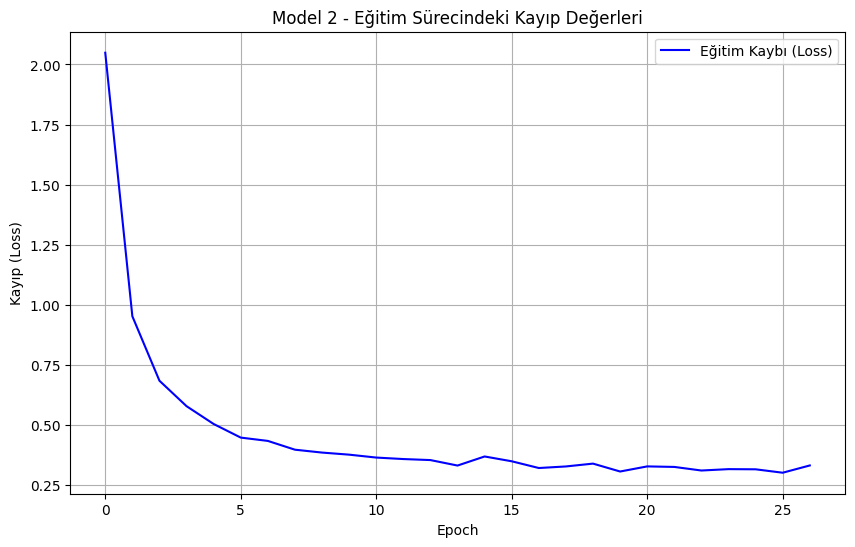

In [85]:
import matplotlib.pyplot as plt

# Model 2'nin eğitim sürecindeki kayıp değerleri kontrol et
if hasattr(best_model2, "loss_curve_"):
    plt.figure(figsize=(10, 6))
    plt.plot(best_model2.loss_curve_, label='Eğitim Kaybı (Loss)', color='blue')
    plt.title('Model 2 - Eğitim Sürecindeki Kayıp Değerleri')
    plt.xlabel('Epoch')
    plt.ylabel('Kayıp (Loss)')
    plt.legend()
    plt.grid()
    plt.show()
else:
    print("Model 2'de 'loss_curve_' özelliği bulunamadı.")


**Grafik bize,** Model 2'nin eğitim sürecindeki kayıp değerlerinin (loss) epoch'lara göre hızlı bir şekilde azaldığını göstermektedir. İlk birkaç epoch'ta kayıp değeri hızla düşerek modelin öğrenmeye başladığını gözlemliyoruz. 15. epoch'tan itibaren kayıp sabitlenmeye başlıyor ve öğrenme süreci daha stabil hale geliyor. Model, hızlı bir optimizasyon süreci geçirmiş ve genel olarak baktığımız iyi bir dengeye ulaşmış olduğunu gözlemliyoruz.

## MLP MODEL 2 : Karışıklık Matrisi:

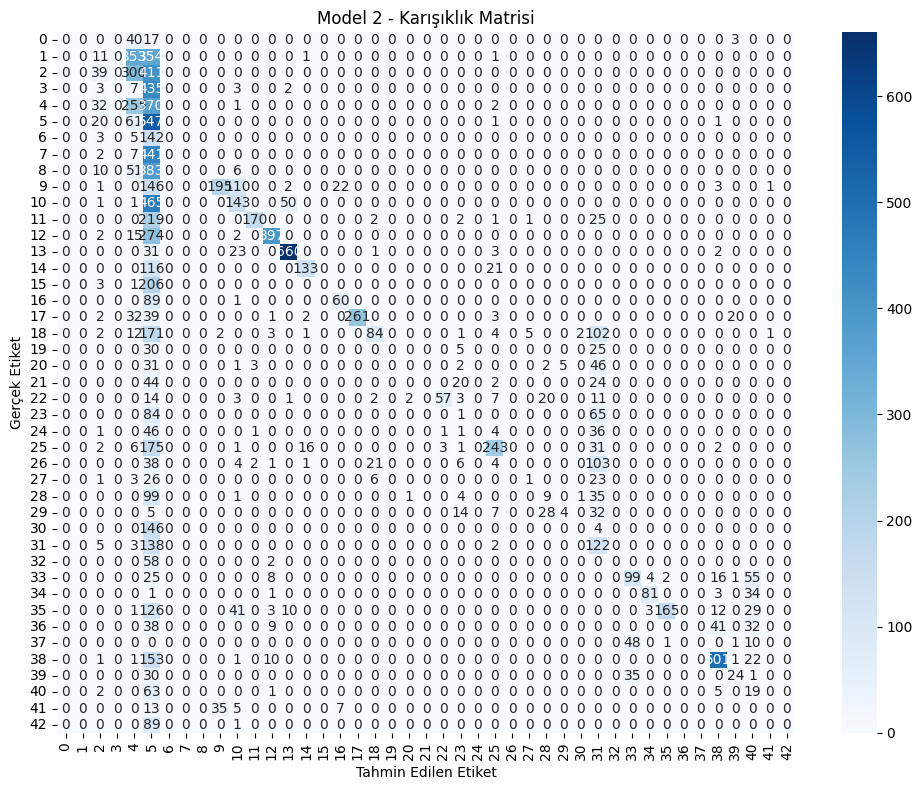

In [89]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Model 2'nin tahmin sonuçları (y_pred_model2) ve gerçek etiketler (y_test)
cm_model2 = confusion_matrix(y_test, y_pred_model2)

# Karışıklık matrisinin görselleştirilmesi
plt.figure(figsize=(10, 8))
sns.heatmap(cm_model2, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
plt.title('Model 2 - Karışıklık Matrisi')
plt.xlabel('Tahmin Edilen Etiket')
plt.ylabel('Gerçek Etiket')
plt.tight_layout()
plt.show()


## MLP MODEL 3 : Model Eğitimi

In [12]:
mlp_model3 = MLPClassifier(
    hidden_layer_sizes=(50,),  # Tek katman, 50 nöron
    max_iter=200,  # 200 epoch
    batch_size=64,  # Her iterasyonda 64 örnek
    activation='logistic',  # Sigmoid aktivasyon fonksiyonu
    learning_rate_init=0.005,  # Öğrenme oranı 0.005
    random_state=42
)
mlp_model3.fit(X_train_scaled, y_train)

y_pred_model3 = mlp_model3.predict(X_test_scaled)
print("Model 3 - Performans (Aktivasyon Fonksiyonunu Değiştiren)")
print(classification_report(y_test, y_pred_model3))



Model 3 - Performans (Aktivasyon Fonksiyonunu Değiştiren)
              precision    recall  f1-score   support

           0       0.40      0.13      0.20        60
           1       0.69      0.81      0.75       720
           2       0.64      0.80      0.71       750
           3       0.67      0.62      0.64       450
           4       0.71      0.50      0.59       660
           5       0.65      0.66      0.66       630
           6       0.90      0.56      0.69       150
           7       0.51      0.71      0.59       450
           8       0.75      0.50      0.60       450
           9       0.85      0.72      0.78       480
          10       0.72      0.94      0.82       660
          11       0.82      0.78      0.80       420
          12       0.97      0.91      0.94       690
          13       0.94      0.96      0.95       720
          14       0.90      0.81      0.86       270
          15       0.58      0.63      0.60       210
          16       0.86

## MLP MODEL 3 : RandomizedSearchCV ile Hiperparametre Optimizasyonu

Fitting 3 folds for each of 10 candidates, totalling 30 fits
Model 3 - En iyi hiperparametreler: {'solver': 'adam', 'max_iter': 200, 'learning_rate_init': 0.001, 'hidden_layer_sizes': (100,), 'batch_size': 64, 'alpha': 0.0001, 'activation': 'relu'}
Model 3 - En iyi doğruluk skoru (cv): 0.726951951951952


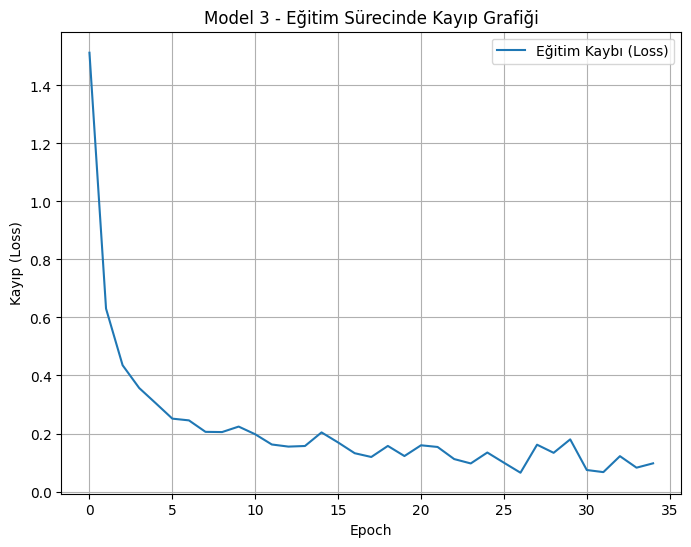

Model 3 - Performans (Hiperparametre Optimizasyonu ile)
              precision    recall  f1-score   support

           0       0.77      0.33      0.47        60
           1       0.77      0.86      0.81       720
           2       0.77      0.87      0.82       750
           3       0.66      0.71      0.68       450
           4       0.77      0.73      0.75       660
           5       0.62      0.71      0.66       630
           6       0.87      0.69      0.77       150
           7       0.87      0.74      0.80       450
           8       0.80      0.82      0.81       450
           9       0.82      0.91      0.86       480
          10       0.89      0.92      0.90       660
          11       0.75      0.86      0.80       420
          12       0.99      0.95      0.97       690
          13       0.98      0.96      0.97       720
          14       0.99      0.80      0.88       270
          15       0.90      0.82      0.86       210
          16       0.95  

In [13]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report
from sklearn.model_selection import RandomizedSearchCV
import numpy as np
import matplotlib.pyplot as plt

# Hiperparametre aralıkları
param_dist_model3 = {
    'hidden_layer_sizes': [(50,), (100,), (50, 50)],  # Tek ve iki katmanlı yapılar
    'activation': ['logistic', 'relu', 'tanh'],  # Farklı aktivasyon fonksiyonları
    'solver': ['adam'],  # Daha hızlı optimizasyon algoritması
    'alpha': [0.0001, 0.001, 0.01],  # L2 regülarizasyon parametresi
    'batch_size': [32, 64],  # Mini-batch boyutları
    'learning_rate_init': [0.001, 0.005, 0.01],  # Öğrenme oranları
    'max_iter': [200]  # Epoch sayısı sabit tutuldu
}

# RandomizedSearchCV tanımlama
random_search_model3 = RandomizedSearchCV(
    MLPClassifier(random_state=42, early_stopping=True),  # Early stopping ile fazla iterasyonları engelleme
    param_distributions=param_dist_model3,
    n_iter=10,  # Rastgele 10 farklı kombinasyon dene
    cv=3,  # 3 katlı çapraz doğrulama
    scoring='accuracy',  # Doğruluk metriği
    n_jobs=-1,  # Tüm işlemcileri kullan
    verbose=2
)

# Modeli eğitme
random_search_model3.fit(X_train_scaled, y_train)

# En iyi hiperparametreleri ve sonuçları yazdırma
print("Model 3 - En iyi hiperparametreler:", random_search_model3.best_params_)
print("Model 3 - En iyi doğruluk skoru (cv):", random_search_model3.best_score_)

# En iyi modeli seçme
best_model3 = random_search_model3.best_estimator_

# Eğitim kaybı grafiği
if hasattr(best_model3, "loss_curve_"):
    plt.figure(figsize=(8, 6))
    plt.plot(best_model3.loss_curve_, label='Eğitim Kaybı (Loss)')
    plt.title('Model 3 - Eğitim Sürecinde Kayıp Grafiği')
    plt.xlabel('Epoch')
    plt.ylabel('Kayıp (Loss)')
    plt.legend()
    plt.grid()
    plt.show()
else:
    print("Modelde loss_curve_ özelliği bulunamadı.")

# Test seti üzerindeki performansı değerlendirme
y_pred_model3 = best_model3.predict(X_test_scaled)
print("Model 3 - Performans (Hiperparametre Optimizasyonu ile)")
print(classification_report(y_test, y_pred_model3))


**Sonuç olarak:** Model 3, %80 doğruluk oranı ile büyük sınıflarda (ör. 13, 12, 10) yüksek performans gösterirken, küçük sınıflarda (ör. 0, 19, 20) zayıf kalmıştır; 100 nöronlu tek katman, relu aktivasyonu ve adam optimizasyonu ile dengeli sonuçlar ürettiğini görüyoruz, fakat model için iyileştirme potansiyeli bulunmakta olduğunu söyleyebiliriz.

# NOT: Model 3'ün İlk Hali ve RandomizedSearchCV ile Optimize Edilmiş Hali Arasındaki Fark:

Optimize edilen modelde, doğruluk değerinde %6 artış ve optimizasyon metriklerinde belirgin iyileşmeler sağlamıştır.
Özellikle küçük örnekleme sahip sınıflarda (Sınıf 0, 19, 41) recall ve F1-Score değerlerinde iyileşme sağlanmıştır.
Daha büyük örneklem destekli sınıflarda (Sınıf 12, 38) ise doğruluk korunarak modelin genel performansı artırılmıştır.
Sonuç: RandomizedSearchCV ile optimize edilen model, genel doğruluk ve sınıf dengesi açısından daha tutarlı ve başarılı bir sonuç verdiğini gözlemlemekteyiz.

## MLP MODEL 3 : Kayıp Değerleri Grafiği

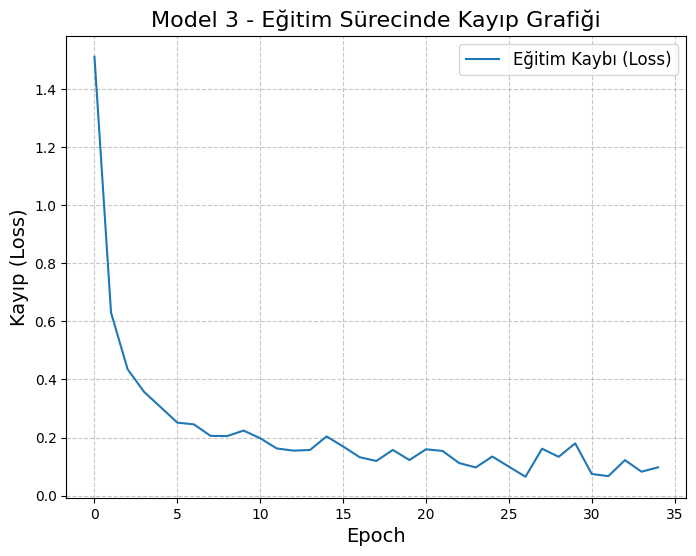

In [88]:
import matplotlib.pyplot as plt

# Model 3'ün kayıp değerlerini kontrol etme ve görselleştirme
if hasattr(best_model3, "loss_curve_"):
    plt.figure(figsize=(8, 6))
    plt.plot(best_model3.loss_curve_, label='Eğitim Kaybı (Loss)')
    plt.title('Model 3 - Eğitim Sürecinde Kayıp Grafiği', fontsize=16)
    plt.xlabel('Epoch', fontsize=14)
    plt.ylabel('Kayıp (Loss)', fontsize=14)
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.legend(fontsize=12)
    plt.show()
else:
    print("Model 3'te 'loss_curve_' özelliği bulunamadı.")


**Grafik bize,** Model 3'ün kaybının (loss) ilk birkaç epoch'ta hızlı bir şekilde düştüğünü ve ardından 20. epoch'tan sonra stabil bir seviyeye ulaştığını göstermektedir. Bu, modelin hızlı öğrenme kapasitesine ve başarılı bir optimizasyon sürecinde olduğunu bize göstermektedir.

## MLP MODEL 3 : Karışıklık Matrisi:

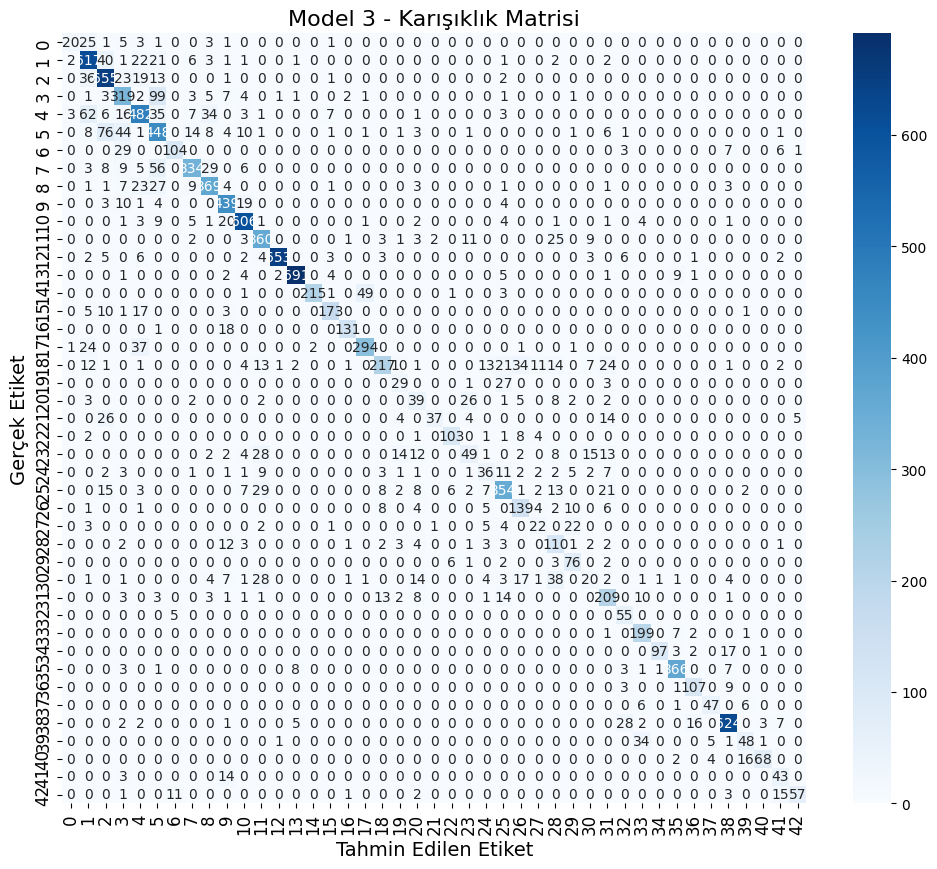

In [39]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Model 3'ün gerçek ve tahmin edilen değerlerini kullanarak karışıklık matrisini hesaplama
confusion_mtx_model3 = confusion_matrix(y_test, y_pred_model3)

# Karışıklık matrisini görselleştirme
plt.figure(figsize=(12, 10))
sns.heatmap(confusion_mtx_model3, annot=True, fmt='d', cmap='Blues', cbar=True)
plt.title("Model 3 - Karışıklık Matrisi", fontsize=16)
plt.xlabel("Tahmin Edilen Etiket", fontsize=14)
plt.ylabel("Gerçek Etiket", fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()


## MLP MODEL 4 : Model Eğitimi

In [23]:
mlp_model4 = MLPClassifier(
    hidden_layer_sizes=(64, 32),  # İki katman: 64 ve 32 nöron
    max_iter=250,  # 250 epoch
    batch_size=32,  # Her iterasyonda 32 örnek işlenecek
    learning_rate_init=0.002,  # Daha düşük öğrenme oranı
    random_state=42
)
mlp_model4.fit(X_train_scaled, y_train)

y_pred_model4 = mlp_model4.predict(X_test_scaled)
print("Model 4 - Performans (Düşük Öğrenme Oranı)")
print(classification_report(y_test, y_pred_model4))



Model 4 - Performans (Düşük Öğrenme Oranı)
              precision    recall  f1-score   support

           0       0.89      0.67      0.76        60
           1       0.76      0.90      0.82       720
           2       0.75      0.84      0.80       750
           3       0.67      0.84      0.74       450
           4       0.75      0.83      0.79       660
           5       0.64      0.63      0.64       630
           6       0.78      0.81      0.80       150
           7       0.87      0.70      0.78       450
           8       0.85      0.76      0.81       450
           9       0.91      0.82      0.86       480
          10       0.94      0.92      0.93       660
          11       0.80      0.84      0.82       420
          12       0.97      0.91      0.94       690
          13       0.97      0.97      0.97       720
          14       0.96      0.81      0.88       270
          15       0.72      0.85      0.78       210
          16       0.91      0.85     

## MLP MODEL 4 : RandomizedSearchCV ile Hiperparametre Optimizasyonu

Fitting 3 folds for each of 10 candidates, totalling 30 fits
Model 4 - En iyi hiperparametreler: {'solver': 'adam', 'max_iter': 250, 'learning_rate_init': 0.001, 'hidden_layer_sizes': (64, 32, 16), 'batch_size': 32, 'alpha': 0.001, 'activation': 'relu'}
Model 4 - En iyi doğruluk skoru (cv): 0.7073573573573574


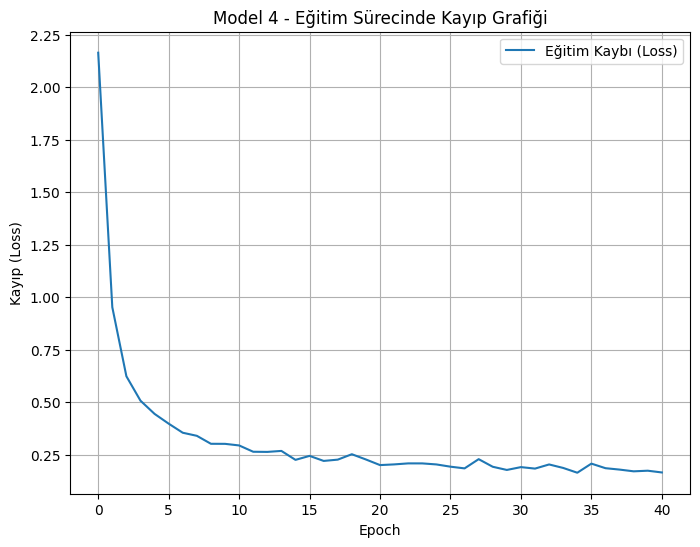

Model 4 - Performans (Hiperparametre Optimizasyonu ile)
              precision    recall  f1-score   support

           0       1.00      0.25      0.40        60
           1       0.72      0.71      0.71       720
           2       0.63      0.90      0.74       750
           3       0.78      0.74      0.76       450
           4       0.83      0.76      0.80       660
           5       0.66      0.80      0.72       630
           6       0.74      0.64      0.69       150
           7       0.84      0.75      0.80       450
           8       0.85      0.77      0.81       450
           9       0.88      0.86      0.87       480
          10       0.91      0.93      0.92       660
          11       0.81      0.85      0.83       420
          12       0.93      0.92      0.93       690
          13       0.98      0.95      0.97       720
          14       0.87      0.89      0.88       270
          15       0.90      0.68      0.78       210
          16       0.96  

In [24]:
"from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report
from sklearn.model_selection import RandomizedSearchCV
import numpy as np
import matplotlib.pyplot as plt

# Hiperparametre aralıkları
param_dist_model4 = {
    'hidden_layer_sizes': [(64, 32), (128, 64), (64, 32, 16)],  # Farklı katman yapıları
    'activation': ['relu', 'tanh'],  # Aktivasyon fonksiyonları
    'solver': ['adam'],  # Hızlı optimizasyon algoritması
    'alpha': [0.0001, 0.001, 0.01],  # L2 regülarizasyon parametresi
    'batch_size': [16, 32],  # Mini-batch boyutları
    'learning_rate_init': [0.001, 0.002, 0.005],  # Öğrenme oranları
    'max_iter': [250]  # Epoch sayısı sabit tutuldu
}

# RandomizedSearchCV tanımlama
random_search_model4 = RandomizedSearchCV(
    MLPClassifier(random_state=42, early_stopping=True),  # Early stopping ile fazla iterasyonları engelle
    param_distributions=param_dist_model4,
    n_iter=10,  # Rastgele 10 farklı kombinasyon dene
    cv=3,  # 3 katlı çapraz doğrulama
    scoring='accuracy',  # Doğruluk metriği
    n_jobs=-1,  # Tüm işlemcileri kullan
    verbose=2
)

# Modeli eğitme
random_search_model4.fit(X_train_scaled, y_train)

# En iyi hiperparametreleri ve sonuçları yazdırma
print("Model 4 - En iyi hiperparametreler:", random_search_model4.best_params_)
print("Model 4 - En iyi doğruluk skoru (cv):", random_search_model4.best_score_)

# En iyi modeli seçme
best_model4 = random_search_model4.best_estimator_

# Eğitim kaybı grafiği çizme
if hasattr(best_model4, "loss_curve_"):
    plt.figure(figsize=(8, 6))
    plt.plot(best_model4.loss_curve_, label='Eğitim Kaybı (Loss)')
    plt.title('Model 4 - Eğitim Sürecinde Kayıp Grafiği')
    plt.xlabel('Epoch')
    plt.ylabel('Kayıp (Loss)')
    plt.legend()
    plt.grid()
    plt.show()
else:
    print("Modelde loss_curve_ özelliği bulunamadı.")

# Test seti üzerindeki performansı değerlendirme
y_pred_model4 = best_model4.predict(X_test_scaled)
print("Model 4 - Performans (Hiperparametre Optimizasyonu ile)")
print(classification_report(y_test, y_pred_model4))


**Sonuç olarak:** Model %80 doğruluk oranına ulaşmıştır. Çok katmanlı bir yapı (64, 32, 16), ReLU aktivasyonu ve adam optimizasyonu ile öğrenme oranı 0.001 olarak optimize edilmiştir. Büyük sınıflarda (ör. sınıf 13, 12, 10) yüksek başarı gösterirken, küçük veri gruplarında (ör. sınıf 0, 19, 24) performans düşüşü yaşamıştır. Genel olarak modelimiz dengeli bir performans sergileyerek büyük sınıflarda etkili sonuçlar sağladığını bize göstermiştir.

# NOT: Model 4'ün İlk Hali ve RandomizedSearchCV ile Optimize Edilmiş Hali Arasındaki Fark:

Optimize edilen model, bazı küçük sınıflarda (Sınıf 30, 41) recall ve F1-Score'da iyileşme sağlamış, ancak büyük sınıflar ve genel doğruluk açısından performansı ilk modelle benzer kalmıştır.
Optimize edilen model, daha derin bir yapıya sahip olduğu için bazı sınıflar için daha iyi uyum sağlamış, ancak overfitting riskine yol açabilecek hafif performans düşüşleri gözlemlenmiştir.
Sonuç: İlk model, genel performans açısından daha dengeli ve başarılıdır. Optimize edilen model, belirli sınıflarda iyileşmeler gösterse de genel doğruluk ve metriklerde hafif bir düşüş yaşamıştır.

## MLP MODEL 4 : Kayıp Değerleri Grafiği

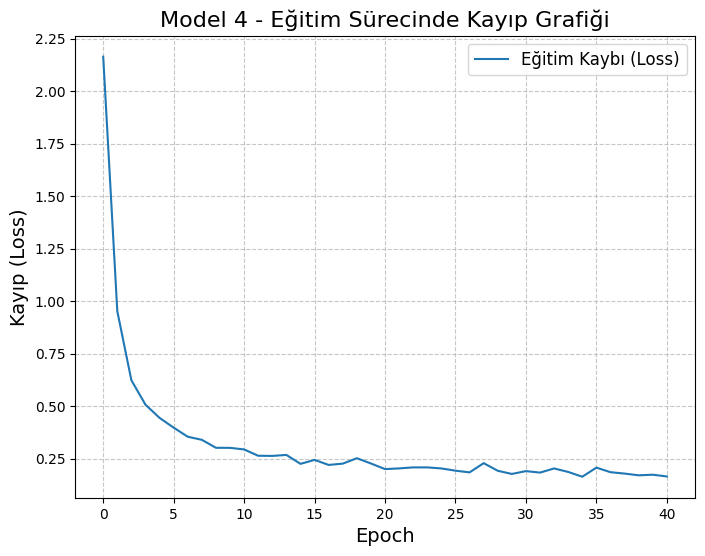

In [90]:
import matplotlib.pyplot as plt

# Model 4'ün kayıp değerlerini görselleştir
if hasattr(best_model4, "loss_curve_"):
    plt.figure(figsize=(8, 6))
    plt.plot(best_model4.loss_curve_, label='Eğitim Kaybı (Loss)')
    plt.title('Model 4 - Eğitim Sürecinde Kayıp Grafiği', fontsize=16)
    plt.xlabel('Epoch', fontsize=14)
    plt.ylabel('Kayıp (Loss)', fontsize=14)
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.legend(fontsize=12)
    plt.show()
else:
    print("Model 4'te 'loss_curve_' özelliği bulunamadı.")


**Grafik bize,** Model 4'ün eğitim kaybında, hızlı bir başlangıç kaybı azalması gösteriyor ve yaklaşık 10. epoch'tan sonra kayıp değerinin oldukça düşük seviyelerde sabitlendiğini ortaya koyuyor. Bu durum, modelin hızlı bir şekilde öğrenme kapasitesine ulaştığını ve eğitim süreci boyunca kararlılığını koruduğunu bize göstermektedir. Kaybın 0.25 seviyesine kadar düştüğü görmekteyiz, bu da modelin genel başarımının iyi olduğunu bize ifade etmektedir.

## MLP MODEL 4 : Karışıklık Matrisi

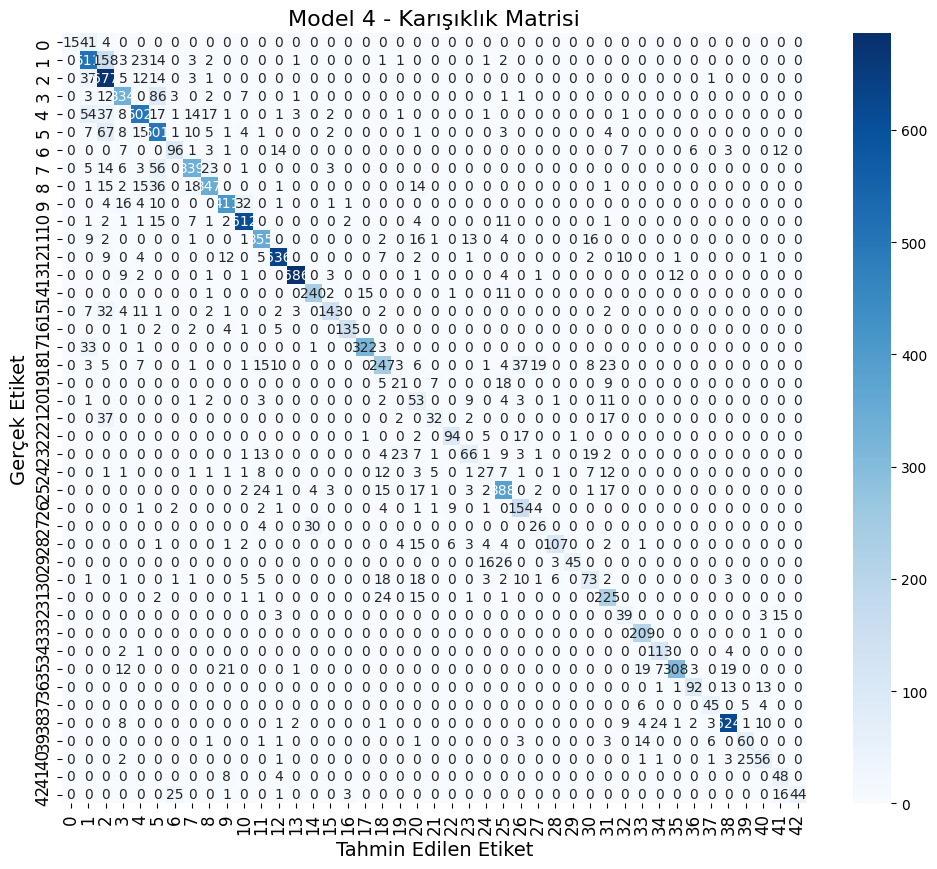

In [91]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Model 4'ün tahmin sonuçları
confusion_mtx_model4 = confusion_matrix(y_test, y_pred_model4)

# Karışıklık matrisini görselleştir
plt.figure(figsize=(12, 10))
sns.heatmap(confusion_mtx_model4, annot=True, fmt='d', cmap='Blues', cbar=True)
plt.title("Model 4 - Karışıklık Matrisi", fontsize=16)
plt.xlabel("Tahmin Edilen Etiket", fontsize=14)
plt.ylabel("Gerçek Etiket", fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()


## 4 MLP Modelinin Performans Sonuçları Grafiği

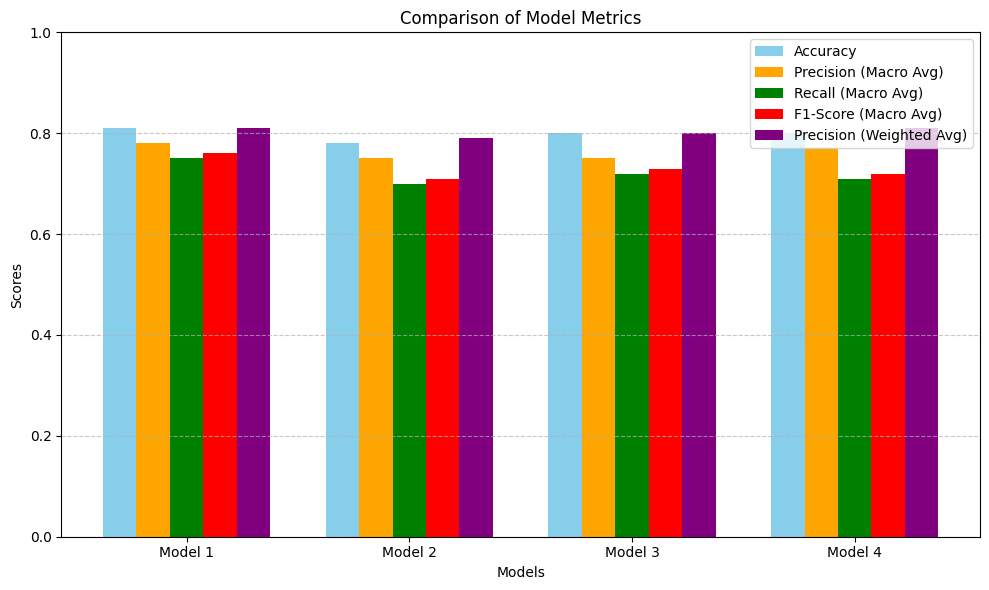

In [32]:
import matplotlib.pyplot as plt
import numpy as np

# Modellerin sonuçları
models = ["Model 1", "Model 2", "Model 3", "Model 4"]
accuracy = [0.81, 0.78, 0.80, 0.80]
precision_macro = [0.78, 0.75, 0.75, 0.77]
recall_macro = [0.75, 0.70, 0.72, 0.71]
f1_macro = [0.76, 0.71, 0.73, 0.72]
precision_weighted = [0.81, 0.79, 0.80, 0.81]

# Grafik oluşturma
x = np.arange(len(models))
width = 0.15

fig, ax = plt.subplots(figsize=(10, 6))

# Her metriği yan yana çubuklarla gösterme
ax.bar(x - 2 * width, accuracy, width, label="Accuracy", color="skyblue")
ax.bar(x - width, precision_macro, width, label="Precision (Macro Avg)", color="orange")
ax.bar(x, recall_macro, width, label="Recall (Macro Avg)", color="green")
ax.bar(x + width, f1_macro, width, label="F1-Score (Macro Avg)", color="red")
ax.bar(x + 2 * width, precision_weighted, width, label="Precision (Weighted Avg)", color="purple")

# Ayarlar
ax.set_xlabel("Models")
ax.set_ylabel("Scores")
ax.set_title("Comparison of Model Metrics")
ax.set_xticks(x)
ax.set_xticklabels(models)
ax.legend(loc="best")
plt.ylim(0, 1)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

# Grafiği gösterme
plt.show()


**Grafik bize, **